<a href="https://colab.research.google.com/github/MagnoSales/TelecomX_Desafio/blob/main/TelecomX_BR_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [186]:
import pandas as pd
import numpy as np


In [187]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [188]:
telecomx_bruto = pd.read_json(url)

In [189]:
telecomx_bruto

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [190]:
telecomx_bruto.to_json('dados_telecomx_bruto.json') #cópia de segurança off line

In [191]:
nome_colunas_bruto = list(telecomx_bruto.columns)
nome_colunas_bruto

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [192]:
telecomx_bruto.shape

(7267, 6)

#🔧 Transformação

#Expandir as colunas - Dicionarios

In [193]:
customer_expandido = pd.json_normalize(telecomx_bruto['customer'])

In [194]:
phone_expandido = pd.json_normalize(telecomx_bruto['phone'])

In [195]:
internet_expandido = pd.json_normalize(telecomx_bruto['internet'])

In [196]:
account_expandido = pd.json_normalize(telecomx_bruto['account'])

#Juntar todos os dataframes expandidos

In [197]:
telecomx_expandido = pd.concat([
    telecomx_bruto[['customerID', 'Churn']],
    customer_expandido, phone_expandido, internet_expandido, account_expandido], axis=1).copy()
telecomx_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Renomear nomes de colunas com caracteres especiais

In [198]:
telecomx_expandido = telecomx_expandido.rename(columns={'Charges.Monthly':'ChargesMonthly', 'Charges.Total':'ChargesTotal',
                                                }).copy()
telecomx_expandido.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [199]:
telecomx_expandido.shape

(7267, 21)

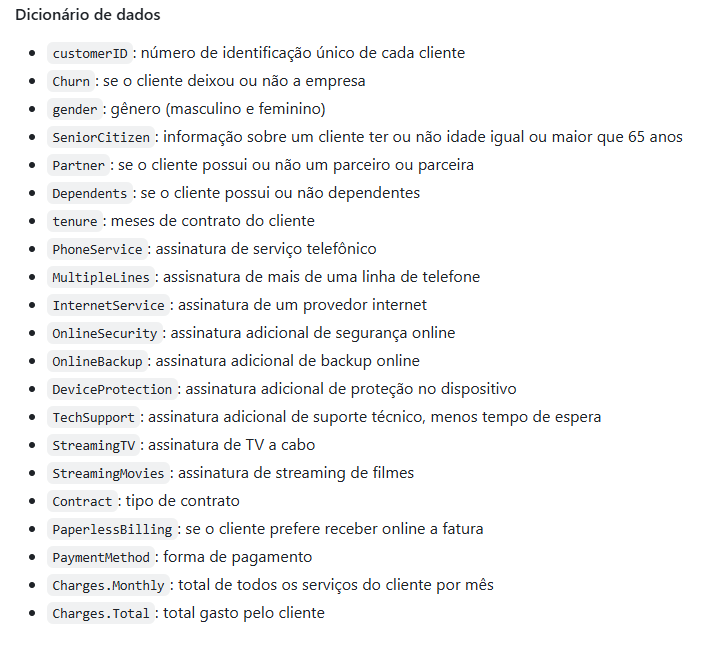

In [200]:
telecomx_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Verificar se há valores nulos

In [201]:
telecomx_expandido.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#Analisar o conteúdo dos campos para correções

#Corrigir valores vazios, zerados, NaN, None,... e verificar se o conteúdo dos campos está padronizado, se não, padronizar.

In [202]:
telecomx_expandido['Churn'].unique().tolist()

['No', 'Yes', '']

In [203]:
telecomx_expandido['gender'].unique().tolist()

['Female', 'Male']

In [204]:
telecomx_expandido['SeniorCitizen'].unique().tolist()

[0, 1]

In [205]:
telecomx_expandido['Partner'].unique().tolist()

['Yes', 'No']

In [206]:
telecomx_expandido['Dependents'].unique().tolist()

['Yes', 'No']

In [207]:
telecomx_expandido['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [208]:
telecomx_expandido['PhoneService'].unique().tolist()

['Yes', 'No']

In [209]:
telecomx_expandido['MultipleLines'].unique().tolist()

['No', 'Yes', 'No phone service']

In [210]:
telecomx_expandido['InternetService'].unique().tolist()

['DSL', 'Fiber optic', 'No']

In [211]:
telecomx_expandido['OnlineSecurity'].unique().tolist()

['No', 'Yes', 'No internet service']

In [212]:
telecomx_expandido['OnlineBackup'].unique().tolist()

['Yes', 'No', 'No internet service']

In [213]:
telecomx_expandido['DeviceProtection'].unique().tolist()

['No', 'Yes', 'No internet service']

In [214]:
telecomx_expandido['TechSupport'].unique().tolist()

['Yes', 'No', 'No internet service']

In [215]:
telecomx_expandido['StreamingTV'].unique().tolist()

['Yes', 'No', 'No internet service']

In [216]:
telecomx_expandido['StreamingMovies'].unique().tolist()

['No', 'Yes', 'No internet service']

In [217]:
telecomx_expandido['Contract'].unique().tolist()

['One year', 'Month-to-month', 'Two year']

In [218]:
telecomx_expandido['PaperlessBilling'].unique().tolist()

['Yes', 'No']

In [219]:
telecomx_expandido['PaymentMethod'].unique().tolist()

['Mailed check',
 'Electronic check',
 'Credit card (automatic)',
 'Bank transfer (automatic)']

In [220]:
telecomx_expandido[telecomx_expandido['ChargesMonthly'].isin(['',' ', 'nan', 'None',0])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


In [221]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([' ',''])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [222]:
telecomx_expandido['ChargesTotal'].describe()

,ChargesTotal
count,7267
unique,6531
top,20.2
freq,11


#limpar espaços em branco nos campos

In [223]:
telecomx_expandido[telecomx_expandido['Churn'].isin([''])].sort_values(by='ChargesTotal')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
1764,2508-QJJFP,,Male,0,No,Yes,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.55,1013.05
4778,6547-ETRKK,,Female,0,Yes,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.80,1021.8
1172,1676-BZZYV,,Male,0,Yes,Yes,55,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,1026.35
3300,4603-FDONU,,Female,0,Yes,Yes,32,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,35.15,1051.05
3202,4471-OIIDG,,Female,0,No,No,10,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,1060.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,9708-TKNTZ,,Female,0,Yes,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,94.45
3207,4477-QAXWD,,Male,0,Yes,No,25,No,No phone service,DSL,...,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.10,970.4
2245,3134-JCVOE,,Female,0,No,No,3,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.20,98.5
540,0769-WXZYU,,Male,0,No,No,34,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.10,980.35


Comentario: #Substituir campo nulo por 'No'. Por quê? Entendo que impossível ser 'Yes' por que o tema churn é muito sensível, e seria uma falha muito grave não apontar. Por exemplo, continuidade da cobrança.

In [224]:
telecomx_expandido['Churn'] = telecomx_expandido['Churn'].replace(['', 'nan', 'None'], 'No')

In [225]:
telecomx_expandido['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Comentario: Mantive os valores de tenure == 0, supondo que se tratam de clientes com menos de 1 mês de base. Em vista inclusive tendo em vista quer o valor da cobrança total está vazio, ou igual a zero.

In [226]:
telecomx_expandido[telecomx_expandido['tenure'].isin([0])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [227]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([' ', 'nan', 'None'])].reset_index(drop=True)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
2,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
3,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
4,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
5,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
6,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
7,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
8,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
9,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [228]:
#usando método where para subistituir os valores vazios dos valores totais pela multiplicação de tenure x cobrança mensal
telecomx_expandido['ChargesTotal'] = np.where(
    telecomx_expandido['ChargesTotal'].str.strip() == '',
    telecomx_expandido['tenure'] * telecomx_expandido['ChargesMonthly'],
    telecomx_expandido['ChargesTotal'])

In [229]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([0])].reset_index(drop=True)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
2,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
3,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
4,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
5,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
6,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
7,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
8,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
9,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [230]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin(['',' ', 'nan', 'None'])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


#Transformar 'Charges.Total' em float


In [231]:
telecomx_expandido['ChargesTotal'] = telecomx_expandido['ChargesTotal'].astype(np.float64)
telecomx_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [232]:
telecomx_expandido['ChargesTotal'].describe()

,ChargesTotal
count,7267.000000
mean,2277.182035
std,2268.648587
min,0.000000
25%,396.200000
50%,1389.200000
75%,3778.525000
max,8684.800000


In [233]:
telecomx_expandido.columns = telecomx_expandido.columns.str.strip() #limpar os espaços em branco das colunas

In [234]:
telecomx_expandido.drop_duplicates() #extrair duplicidades

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [235]:
telecomx_expandido.shape

(7267, 21)

In [236]:
telecomx_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Criando um novo dataframe para iniciar a análise

In [237]:
df_telecomx = telecomx_expandido.copy().reset_index(drop=True)

In [238]:
df_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga e análise

#Proporção de churn na base

In [239]:
#Proporção de churn na base
churn_percentual = round(df_telecomx['Churn'].value_counts(normalize=True) * 100,2)
print(f'Abertura do percentual de churn da Base:\n{churn_percentual}')

Abertura do percentual de churn da Base:
Churn
No     74.28
Yes    25.72
Name: proportion, dtype: float64


Comentário:
O percentual de churn da base é de 25,72%

In [240]:
#Churn por gênero
churn_gender = round(df_telecomx[['Churn','gender']].value_counts(normalize=True) * 100,2)
pt_churn_gender = churn_gender.loc[('Yes')]
print(f'Abertura do churn por gênero:\n{pt_churn_gender}')

Abertura do churn por gênero:
gender
Female    12.92
Male      12.80
Name: proportion, dtype: float64


Comentário:
Abrindo somente o churn (churn 'Yes'), verifica-se que a proporção dele por gênero é igualmente distribuída, não podendo inferir que um outro sexo seja o de maior impacto.

In [241]:
#Distribuição de churn por gênero e senioridade
churn_senior = round(df_telecomx[['Churn','gender','SeniorCitizen']].value_counts(normalize=True) * 100,2)
pt_churn_senior = churn_senior.loc[('Yes')]
print(f'Churn por caracterisiticas de gênero e senioridade:\n{pt_churn_senior}')

Churn por caracterisiticas de gênero e senioridade:
gender  SeniorCitizen
Female  0                9.62
Male    0                9.55
Female  1                3.30
Male    1                3.25
Name: proportion, dtype: float64


Comentario: A abertura do churn considerando o sexo e a senioridade, também não explica a ocorrência por estas características pessoais.

In [242]:
#Distribuição de churn por gênero, senioridade e se o cliente tem dependentes
churn_partner = round(df_telecomx[['Churn','gender','SeniorCitizen','Partner']].value_counts(normalize=True) *100,2)
pt_churn_partner = churn_partner.loc[('Yes')]
pt_churn_partner_sum = round(churn_partner.loc[('Yes')].sum(),2)
print(f'Total de churn na base: {pt_churn_partner_sum} \n')
print(f'Distribuição de churn por gênero, senioridade e se o cliente tem dependentes: \n{pt_churn_partner}')

Total de churn na base: 25.72 

Distribuição de churn por gênero, senioridade e se o cliente tem dependentes: 
gender  SeniorCitizen  Partner
Male    0              No         6.34
Female  0              No         6.34
                       Yes        3.28
Male    0              Yes        3.21
Female  1              No         2.19
Male    1              No         1.64
                       Yes        1.61
Female  1              Yes        1.11
Name: proportion, dtype: float64


Comentario: Analisando as caracteristicas pessoais de gênero, senioridade e se o cliente tem parceiros, também não é conclusiva, sendo os valores dos que tem parceiros dos que não tem, não é material. Exceto no caso do genero feminino, senior e sem parceiro, com variação de 0.5% a mais do que o genero masculino, nas mesmas condições.

In [243]:
#Analise de caracteristicas pessoais versus a exitência de dependentes
churn_depend = round(df_telecomx[['Churn','gender','SeniorCitizen','Partner','Dependents']].value_counts(normalize=True) *100,2)
pt_churn_depend = churn_depend.loc[('Yes')]
pt_churn_depend_sum = churn_depend.loc[('Yes')].sum()
print(f'Total de churn na base: {pt_churn_depend_sum} \n')
print(f'Variação do churn pelas caracteristicas pessoais versus a exitência de dependentes: \n{pt_churn_depend}')

Total de churn na base: 25.69 

Variação do churn pelas caracteristicas pessoais versus a exitência de dependentes: 
gender  SeniorCitizen  Partner  Dependents
Female  0              No       No            5.90
Male    0              No       No            5.75
Female  1              No       No            2.17
Male    0              Yes      No            1.76
Female  0              Yes      Yes           1.71
Male    1              No       No            1.62
Female  0              Yes      No            1.57
Male    0              Yes      Yes           1.44
        1              Yes      No            1.44
Female  1              Yes      No            1.00
Male    0              No       Yes           0.59
Female  0              No       Yes           0.44
Male    1              Yes      Yes           0.17
Female  1              Yes      Yes           0.11
                       No       Yes           0.01
Male    1              No       Yes           0.01
Name: proportion, dtype:

# Criando a coluna contas diárias (Daily Charges)


In [244]:
df_telecomx['Daily_Charges'] = df_telecomx['ChargesMonthly'] / 30

#criar nova coluna com tempo de base

In [245]:
df_telecomx['tenure'].describe() # Verificar os tempos de base

,tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [246]:
df_telecomx['TempoBase'] = np.where(df_telecomx['tenure'] <= 4, '< 4 Meses',
                           np.where(df_telecomx['tenure'] <= 9, '< 5 - 9 Meses',
                           np.where(df_telecomx['tenure'] <= 12, '< 10 - 12 Meses',
                           np.where(df_telecomx['tenure'] <= 24, '< 13 - 24 Meses',
                           np.where(df_telecomx['tenure'] <= 36, '< 25 - 36 Meses','> 36 Meses')))))

In [247]:
ordemdotempo = ['< 4 Meses','< 5 - 9 Meses','< 10 - 12 Meses','< 13 - 24 Meses','< 25 - 36 Meses','> 36 Meses']
ordem_contrato = ['Month-to-month', 'One year', 'Two year']

In [248]:
#Avaliar a distribuiçao do churn por tempo de base
cros_churn_TempoBase = round(df_telecomx[['Churn','TempoBase']].value_counts(normalize=True) * 100,2)
cros_churn_TempoBase = cros_churn_TempoBase.loc[('Yes')]
print(f'Total de churn na base: {cros_churn_TempoBase.sum()}\n')
cros_churn_ordenado = cros_churn_TempoBase.reindex(ordemdotempo)
print(cros_churn_ordenado)

Total de churn na base: 25.73

TempoBase
< 4 Meses          9.36
< 5 - 9 Meses      3.34
< 10 - 12 Meses    1.57
< 13 - 24 Meses    4.05
< 25 - 36 Meses    2.48
> 36 Meses         4.93
Name: proportion, dtype: float64


Comentário: A avaliação do churn por tempo de base nos mostra que o churn está concentrado nas faixas de tempo de permanência de até 24 meses (17%), sendo muito concentrada no período de até 4 meses (9,3%), isto é, mais da metade do valor. Depois volta subir após 36 meses.

In [249]:
#Análise da distribuição do churn, olhando para o tipo de contrato versus o tempo de base
cros_churn_contrato = round(df_telecomx[['Churn','TempoBase','Contract']].value_counts(normalize=True) * 100,2)
cros_churn_contrato = cros_churn_contrato.loc[('Yes')]
print('Total de churn: ',cros_churn_contrato.sum(),'\n')
print("Percentuais de churn por tipo de contrato: " + '\n',cros_churn_contrato.groupby('Contract').sum(),'\n')
df_cros_churn_contrato = cros_churn_contrato.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_contrato = df_cros_churn_contrato.reindex(index=ordemdotempo, columns=ordem_contrato)
print("Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': "+'\n',df_cros_churn_contrato)

Total de churn:  25.73 

Percentuais de churn por tipo de contrato: 
 Contract
Month-to-month    22.78
One year           2.29
Two year           0.66
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': 
 Contract         Month-to-month  One year  Two year
TempoBase                                          
< 4 Meses                  9.32      0.04       NaN
< 5 - 9 Meses              3.29      0.06       NaN
< 10 - 12 Meses            1.49      0.08       NaN
< 13 - 24 Meses            3.83      0.22       NaN
< 25 - 36 Meses            2.17      0.28      0.03
> 36 Meses                 2.68      1.61      0.63


Comentário: Aqui vê-se claramente que o tipo de contrato 'Month-to-month' é responsável por 88,5% (22,78/25,73) do churn, sendo marcadamente preponderante na faixa de até 9 meses, além de estar presente nas demais faixas. Os outros tipos de contratos não tem participação relevante dentro das faixas de tempo. Podemos concluir que pelo tipo de contrato, o tipo 'Month-to-month' é responsável pelo volume de churn.

In [250]:
#Avaliação do churn pelo tipo de serviço de telefonia.
cros_churn_PhoneService = round(df_telecomx[['Churn','TempoBase','PhoneService']].value_counts(normalize=True) * 100,2)
cros_churn_PhoneService = cros_churn_PhoneService.loc[('Yes')]
print('Total de churn: ',round(cros_churn_PhoneService.sum(),2),'\n')
print("Percentuais de churn de Clientes com PhoneService: "+'\n',cros_churn_PhoneService.groupby('PhoneService').sum(),'\n')
#print(cros_churn_PhoneService.sum()/cros_churn_PhoneService('PhoneService').loc('Yes').sum())

Total de churn:  25.7 

Percentuais de churn de Clientes com PhoneService: 
 PhoneService
No      2.33
Yes    23.37
Name: proportion, dtype: float64 



Comentário: Verica-se que os clientes que possuem o tipo de serviço 'PhoneService', são responsáveis por 23,37% (92%) do churn.

In [251]:
ordem_InternetService = ['DSL','Fiber optic','No']

In [252]:
#Análise da participação do churn pelo tipo de serviço de internet
cros_churn_InternetService = round(df_telecomx[['Churn','TempoBase','InternetService']].value_counts(normalize=True) * 100,2)
cros_churn_InternetService = cros_churn_InternetService.loc[('Yes')]
print('Total de churn: ',cros_churn_InternetService.sum(),'\n')
print("Percentuais de churn de Clientes com InternetService: " + '\n', cros_churn_InternetService.groupby('InternetService').sum(),'\n')
df_cros_churn_InternetService = cros_churn_InternetService.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_InternetService = df_cros_churn_InternetService.reindex(index=ordemdotempo, columns=ordem_InternetService)
print(f'Percentuais de distribuição de churn por tipo de contrato e tempo de base %: \n {df_cros_churn_InternetService}')

Total de churn:  25.72 

Percentuais de churn de Clientes com InternetService: 
 InternetService
DSL             6.32
Fiber optic    17.85
No              1.55
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base %: 
 InternetService   DSL  Fiber optic    No
TempoBase                               
< 4 Meses        3.01         5.34  1.00
< 5 - 9 Meses    0.80         2.37  0.18
< 10 - 12 Meses  0.32         1.17  0.08
< 13 - 24 Meses  0.91         3.01  0.12
< 25 - 36 Meses  0.33         2.08  0.07
> 36 Meses       0.95         3.88  0.10


Comentário: Verifica-se que os clientes que possuem o serviço de fibra ótica são os maiores participantes do churn, com 17,85%, representando 69,4%, sendo sua participação distribuída por todas as faixas de tempo de base.

In [253]:
ordem_PaymentMethod = ['Mailed check', 'Electronic check', 'Credit card (automatic)','Bank transfer (automatic)']

In [254]:
#Avaliação da participação no churn por tipo de pagamento
cros_churn_PaymentMethod = round(df_telecomx[['Churn','TempoBase','PaymentMethod']].value_counts(normalize=True) * 100,2)
cros_churn_PaymentMethod = cros_churn_PaymentMethod.loc[('Yes')]
print('Total de churn: ',cros_churn_PaymentMethod.sum(),'\n')
print("Percentuais de churn por tipo de contrato: " + '\n', cros_churn_PaymentMethod.groupby('PaymentMethod').sum(),'\n')
df_cros_churn_PaymentMethod = cros_churn_PaymentMethod.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_PaymentMethod = df_cros_churn_PaymentMethod.reindex(index=ordemdotempo, columns=ordem_PaymentMethod)
print("Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': " + '\n',df_cros_churn_PaymentMethod)

Total de churn:  25.71 

Percentuais de churn por tipo de contrato: 
 PaymentMethod
Bank transfer (automatic)     3.56
Credit card (automatic)       3.19
Electronic check             14.72
Mailed check                  4.24
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': 
 PaymentMethod    Mailed check  Electronic check  Credit card (automatic)  \
TempoBase                                                                  
< 4 Meses                2.57              5.50                     0.59   
< 5 - 9 Meses            0.61              1.94                     0.34   
< 10 - 12 Meses          0.22              0.89                     0.18   
< 13 - 24 Meses          0.40              2.53                     0.58   
< 25 - 36 Meses          0.23              1.44                     0.40   
> 36 Meses               0.21              2.42                     1.10   

PaymentMethod    Bank transfer (automatic)  
TempoB

Comentário:O método de pagameto por 'Electronic check' é responsável por 14,7% do churn, o que representa 57% do total, embora os demais métodos tenham participação relevante, não são os ofensores.

In [255]:
df_telecomx['dist_valores'] = np.where(df_telecomx['ChargesMonthly'] < 35, '< $35',
                           np.where(df_telecomx['ChargesMonthly'] <= 70, '< $35 - $70',
                           np.where(df_telecomx['ChargesMonthly'] <= 90, '< $71 - $90',
                           np.where(df_telecomx['ChargesMonthly'] >90, '> $90','> $90'))))

In [256]:
df_telecomx.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Daily_Charges,TempoBase,dist_valores
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,< 5 - 9 Meses,< $35 - $70
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,< 5 - 9 Meses,< $35 - $70
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,< 4 Meses,< $71 - $90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,< 13 - 24 Meses,> $90
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,< 4 Meses,< $71 - $90


In [257]:
df_telecomx['dist_valores'].unique()

array(['< $35 - $70', '< $71 - $90', '> $90', '< $35'], dtype=object)

In [258]:
ordem_valores=['< $35','< $35 - $70', '< $71 - $90', '> $90' ]

In [263]:
# Análise dos valores médios de pagamentos por tempo de base, comparando com o Não Churn
total_charges_churn = round(df_telecomx[df_telecomx['Churn'] == 'Yes']['ChargesMonthly'].mean(),2)
total_charges_no_churn = round(df_telecomx[df_telecomx['Churn'] == 'No']['ChargesMonthly'].mean(),2)

cros_churn_charges_pct = round(df_telecomx.groupby(['TempoBase','Churn'])['ChargesMonthly'].mean().unstack(level=1),2)
cros_churn_charges_pct = cros_churn_charges_pct.reindex(index=ordemdotempo)

print("Média geral - Churn:", total_charges_churn)
print("Média geral - No Churn:", total_charges_no_churn)
print("\nMédia por Churn e TempoBase:")
print(f'{cros_churn_charges_pct}')

Média geral - Churn: 74.44
Média geral - No Churn: 61.35

Média por Churn e TempoBase:
Churn               No    Yes
TempoBase                    
< 4 Meses        44.12  62.19
< 5 - 9 Meses    51.24  73.48
< 10 - 12 Meses  48.32  77.26
< 13 - 24 Meses  54.78  78.51
< 25 - 36 Meses  60.64  84.27
> 36 Meses       69.69  89.18


Comentário: Verifica-se claramente que os valores de clientes com churn são mais altos, que os no churn, de forma que os clientes que tem débito acima da média do 'no churn' tem propensão ao churn.